In [1]:
import numpy as np
import pandas as pd
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv('biosensing_data.csv')
# string to list
df['Microbial_Signature'] = df['Microbial_Signature'].apply(ast.literal_eval)
# list to separate columns
df_expanded = pd.DataFrame(df['Microbial_Signature'].tolist(), columns=['Feature1', 'Feature2', 'Feature3'])
label_encoder = LabelEncoder()
df['classification_label_number'] = label_encoder.fit_transform(df.iloc[:, -1])

X = df_expanded.values  # Convert dataframe to numpy array
y = df['classification_label_number'].values

# LDA
lda = LinearDiscriminantAnalysis()
X_proj = lda.fit_transform(X, y)

# Print transformed features
print("Transformed Features (Fisher Projection):\n", X_proj)

Transformed Features (Fisher Projection):
 [[ 0.72026634 -0.13540976  1.36565719]
 [-0.67838611 -0.36323551 -0.08087159]
 [ 0.04566598 -2.20782713 -0.35060249]
 ...
 [-1.41861714 -0.08411429 -1.34301164]
 [-1.45276821  0.27052216 -0.35893498]
 [-0.08243838 -0.27501094 -1.23315625]]


In [2]:
df

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label,classification_label_number
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",Hepatitis,4
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",Influenza,5
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",Aspergillus,0
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",L. monocytogenes,6
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",Salmonella,8
...,...,...,...,...,...,...,...,...,...
995,sample_0996,Optical,pathogen_0996,Virus,"[0.4742671368009727, 0.6502627749042126, 0.710...",1,"[0.6679646260692743, 0.9158394026949797, 1.0]",Hepatitis,4
996,sample_0997,Electrochemical,pathogen_0997,Fungi,"[0.4366640345020176, 0.5544085809506821, 0.446...",1,"[0.7876213491379228, 1.0, 0.805928110510193]",Aspergillus,0
997,sample_0998,Optical,pathogen_0998,Fungi,"[0.36017198514109483, 0.7499662724989562, 0.48...",1,"[0.4802509104055691, 1.0, 0.6507383883406261]",Penicillium,7
998,sample_0999,Mass-based,pathogen_0999,Fungi,"[0.5349732742012165, 0.7582471809010799, 0.546...",0,"[0.7055394173249272, 1.0, 0.7202959522294016]",Aspergillus,0


In [3]:
A = df_expanded
A['classification_label'] = df.iloc[:, -2]

In [4]:
A

,Feature1,Feature2,Feature3,classification_label
0,0.686348,0.351971,0.479209,Hepatitis
1,0.511493,0.590626,0.437371,Influenza
2,0.343812,0.369256,0.116776,Aspergillus
3,0.666280,0.464673,0.450686,L. monocytogenes
4,0.766623,0.388922,0.387402,Salmonella
...,...,...,...,...
995,0.474267,0.650263,0.710018,Hepatitis
996,0.436664,0.554409,0.446813,Aspergillus
997,0.360172,0.749966,0.488032,Penicillium
998,0.534973,0.758247,0.546162,Aspergillus


In [5]:
X1 = A[ (A.iloc[:,-1] == 'Salmonella') | (A.iloc[:,-1] == 'Penicillium')]

In [6]:
X1

,Feature1,Feature2,Feature3,classification_label
4,0.766623,0.388922,0.387402,Salmonella
6,0.463070,0.463383,0.647654,Penicillium
11,0.639548,0.642052,0.658589,Penicillium
14,0.482855,0.470848,0.430179,Penicillium
15,0.544137,0.629784,0.448711,Salmonella
...,...,...,...,...
983,0.266054,0.586154,0.410900,Penicillium
991,0.146134,0.228725,0.148454,Penicillium
992,0.382279,0.435461,0.493364,Salmonella
993,0.794987,0.714453,0.334393,Salmonella


In [7]:
label_encoder = LabelEncoder()
X1['classification_label_number'] = label_encoder.fit_transform(X1.iloc[:, -1])

C:\Users\Akanksha\AppData\Local\Temp\ipykernel_14528\1581536008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['classification_label_number'] = label_encoder.fit_transform(X1.iloc[:, -1])


In [8]:
X1_lda = X1.iloc[:,:3].values  # Convert dataframe to numpy array
y1 = X1['classification_label_number'].values

# LDA
lda = LinearDiscriminantAnalysis()
X1_proj = lda.fit_transform(X1_lda, y1)

# Print transformed features
print("Transformed Features (Fisher Projection):\n", X1_proj)

Transformed Features (Fisher Projection):
 [[ 7.30310434e-01]
 [-9.44004255e-01]
 [ 8.03318070e-02]
 [ 2.41638015e-01]
 [ 9.06997935e-01]
 [ 7.77169374e-01]
 [-3.76019641e-01]
 [ 8.38818713e-01]
 [-1.99717043e+00]
 [-9.03459617e-01]
 [ 8.97356859e-03]
 [-9.39389721e-01]
 [-2.97106436e-01]
 [-1.06511577e+00]
 [-1.92058569e+00]
 [ 5.86174201e-01]
 [ 5.07829444e-01]
 [ 4.58125940e-01]
 [-1.86168522e-01]
 [ 6.12662239e-03]
 [-7.71806566e-01]
 [-9.09883703e-01]
 [-1.16534023e+00]
 [ 6.54765093e-01]
 [-4.70173309e-01]
 [-1.14195110e+00]
 [-2.87673201e-01]
 [-3.87091369e-01]
 [-7.88991382e-01]
 [ 7.87219471e-02]
 [-4.53525358e-01]
 [ 6.71699300e-01]
 [-1.49131096e+00]
 [ 6.93973910e-01]
 [ 3.03950161e-01]
 [ 2.07486989e+00]
 [-1.41438354e+00]
 [-4.87954951e-01]
 [-1.31219596e-01]
 [-1.44070911e-01]
 [ 1.85806575e-01]
 [ 5.70833788e-02]
 [-9.72861680e-01]
 [-1.09389579e+00]
 [-1.13671471e+00]
 [ 1.17068975e+00]
 [-5.50822821e-01]
 [ 1.35833402e-01]
 [ 5.52520369e-01]
 [ 2.40396440e-01]
 [ 3.33

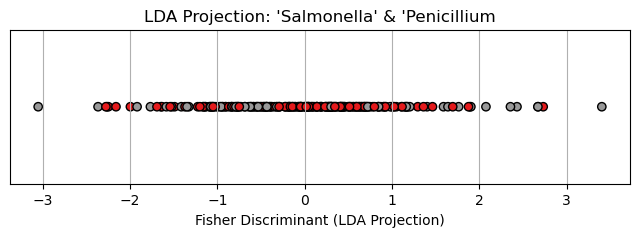

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
plt.scatter(X1_proj, [0]*len(X1_proj), c=y1, cmap='Set1', edgecolor='k')
plt.xlabel("Fisher Discriminant (LDA Projection)")
plt.yticks([])
plt.title("LDA Projection: 'Salmonella' & 'Penicillium")
plt.grid(True)
plt.show()

In [10]:
X1.columns = X1.columns.str.strip()

# Function: Keep rows where Feature1 is within Median ± 10% of IQR for each class
def filter_feature1_by_median_iqr(df, feature='Feature1', label_col='classification_label', iqr_fraction=0.19):
    filtered_df = pd.DataFrame()

    for label, group in df.groupby(label_col):
        q1 = group[feature].quantile(0.25)
        q3 = group[feature].quantile(0.75)
        iqr = q3 - q1
        median = group[feature].median()
        
        margin = iqr * iqr_fraction
        lower = median - margin
        upper = median + margin

        group_filtered = group[(group[feature] >= lower) & (group[feature] <= upper)]
        filtered_df = pd.concat([filtered_df, group_filtered], axis=0)

        print(f"{label}: Kept {len(group_filtered)} of {len(group)} rows (Feature1 range: {lower:.4f} to {upper:.4f})")

    return filtered_df.reset_index(drop=True)

# Apply
filtered_df = filter_feature1_by_median_iqr(X1)


Penicillium: Kept 20 of 121 rows (Feature1 range: 0.4462 to 0.5316)
Salmonella: Kept 28 of 103 rows (Feature1 range: 0.4817 to 0.5740)


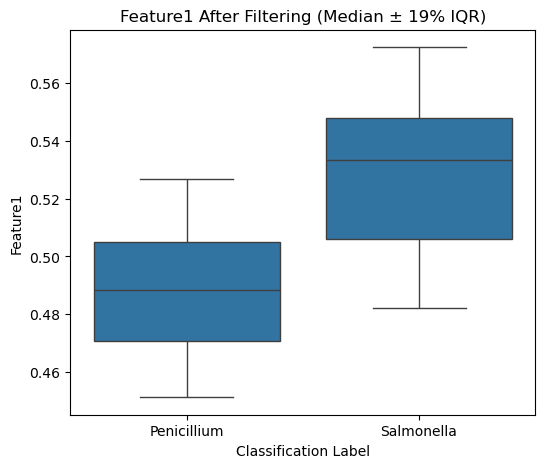

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(x='classification_label', y='Feature1', data=filtered_df)
plt.title('Feature1 After Filtering (Median ± 19% IQR)')
plt.xlabel('Classification Label')
plt.ylabel('Feature1')
plt.show()

In [74]:
def filter_by_sigma(df, feature='Feature1', label_col='classification_label'):
    filtered = pd.DataFrame()
    for label, group in df.groupby(label_col):
        mean = group[feature].mean()
        std = group[feature].std()
        lower = mean - 0.088*std
        upper = mean + 0.088*std
        filtered = pd.concat([filtered, group[(group[feature] >= lower) & (group[feature] <= upper)]])
    return filtered.reset_index(drop=True)

# Usage:
filtered_df2 = filter_by_sigma(X1)
print(filtered_df2)

    Feature1  Feature2  Feature3 classification_label  \
0   0.482855  0.470848  0.430179          Penicillium   
1   0.495922  0.593237  0.425963          Penicillium   
2   0.493212  0.324291  0.557725          Penicillium   
3   0.501229  0.594143  0.472676          Penicillium   
4   0.488874  0.401974  0.433860          Penicillium   
5   0.479420  0.181750  0.142036          Penicillium   
6   0.504000  0.476731  0.463611          Penicillium   
7   0.487657  0.551957  0.440983          Penicillium   
8   0.509391  0.560077  0.498096           Salmonella   
9   0.506985  0.423848  0.439609           Salmonella   
10  0.494708  0.528769  0.480202           Salmonella   
11  0.515033  0.478264  0.426445           Salmonella   
12  0.500962  0.656192  0.925915           Salmonella   
13  0.502992  0.625218  0.739242           Salmonella   

    classification_label_number  
0                             0  
1                             0  
2                             0  
3       

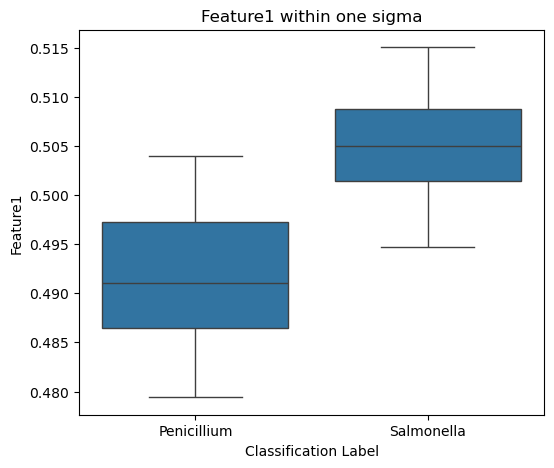

In [76]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='classification_label', y='Feature1', data=filtered_df2)
plt.title('Feature1 within one sigma')
plt.xlabel('Classification Label')
plt.ylabel('Feature1')
plt.show()